In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('../data/titanic_clean.csv')

In [2]:
#Pclass 정수로 type 변환
train['Pclass'] =train['Pclass'].astype(int)
train['Age'] = train['Age'].astype(int)
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num',
       'Embarked_num', 'E_C', 'E_Q', 'E_S'],
      dtype='object')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    int64  
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    object 
 11  Embarked      891 non-null    object 
 12  Sex_num       891 non-null    int64  
 13  Embarked_num  891 non-null    int64  
 14  E_C           891 non-null    int64  
 15  E_Q           891 non-null    int64  
 16  E_S           891 non-null    int64  
dtypes: float64(1), int64(11), object(5)
memory usage: 118.5+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num,Embarked_num,E_C,E_Q,E_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.303030,29.544332,0.523008,0.381594,32.204208,0.647587,1.536476,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.833418,13.013778,1.102743,0.806057,49.693429,0.477990,0.791503,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200,1.000000,2.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000,1.000000,1.000000,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
df_eda = train.loc[:,'PassengerId':'Embarked']
# 데이터 프레임간의 correlation(상관관계)를 살펴봄.
df_eda.corr()['PassengerId':'Fare']

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.025124,0.033741,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.334241,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.025124,-0.334241,1.000000,-0.334923,0.082875,0.021693,-0.547980
Age,0.033741,-0.067809,-0.334923,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.035322,0.082875,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.021693,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.547980,0.093856,0.159651,0.216225,1.000000


<AxesSubplot:>

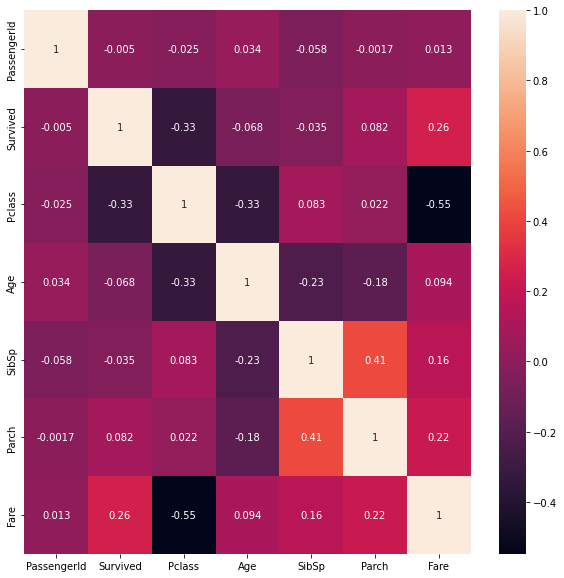

In [6]:
# DataFrame의 corr() 메소드와 Seaborn의 heatmap() 메소드를 이용
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_eda.corr(), annot=True)

<AxesSubplot:>

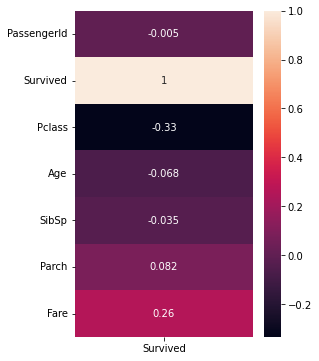

In [7]:
fig = plt.figure(figsize=(4, 6))
sns.heatmap(df_eda.corr()[['Survived']], annot=True)

In [8]:
df_eda.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df_eda['Pclass'].value_counts()

3    485
1    215
2    191
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

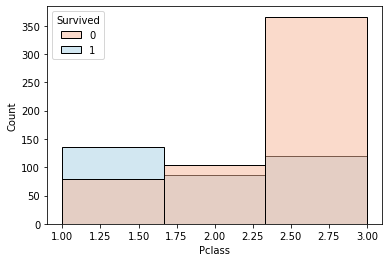

In [10]:
# Seaborn의 countplot() 및 histplot()을 사용하여 각 컬럼과 생존과의 관계를 시각화
sns.histplot(x='Pclass', data=df_eda, hue='Survived', palette='RdBu',bins=3)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

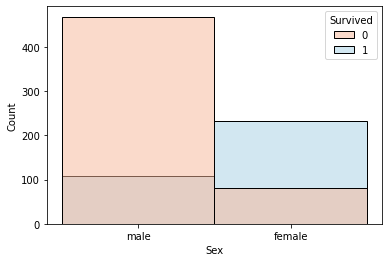

In [11]:
sns.histplot(x='Sex', data=df_eda, hue='Survived', palette='RdBu',bins=2)

<AxesSubplot:xlabel='Age', ylabel='Count'>

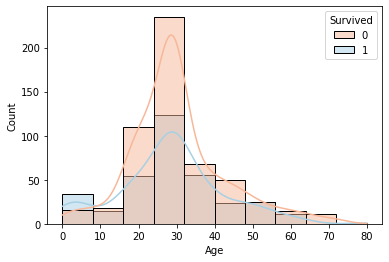

In [12]:
sns.histplot(x='Age', data=df_eda, hue='Survived', palette='RdBu',bins=10, kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

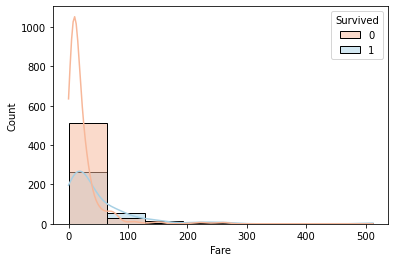

In [13]:
sns.histplot(x='Fare', data=df_eda, hue='Survived', palette='RdBu', bins=8, kde=True)

In [14]:
df_eda['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

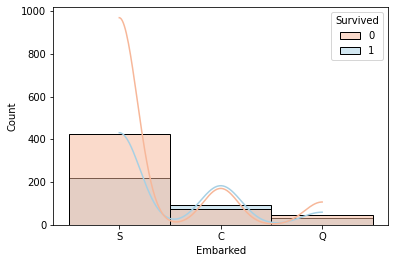

In [16]:
sns.histplot(x='Embarked', data=df_eda, hue='Survived', palette='RdBu', bins=8, kde=True)

In [17]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


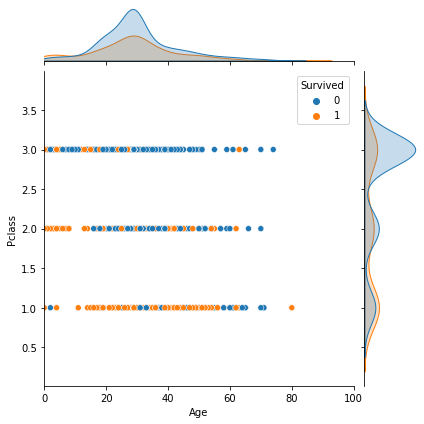

In [18]:
sns.jointplot(x='Age', y='Pclass', data=df_eda, hue='Survived', xlim=(0,100))

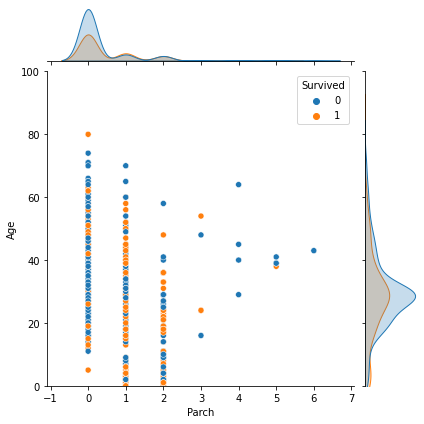

In [19]:
sns.jointplot(x='Parch', y='Age', data=df_eda, hue='Survived', ylim=(0,100))

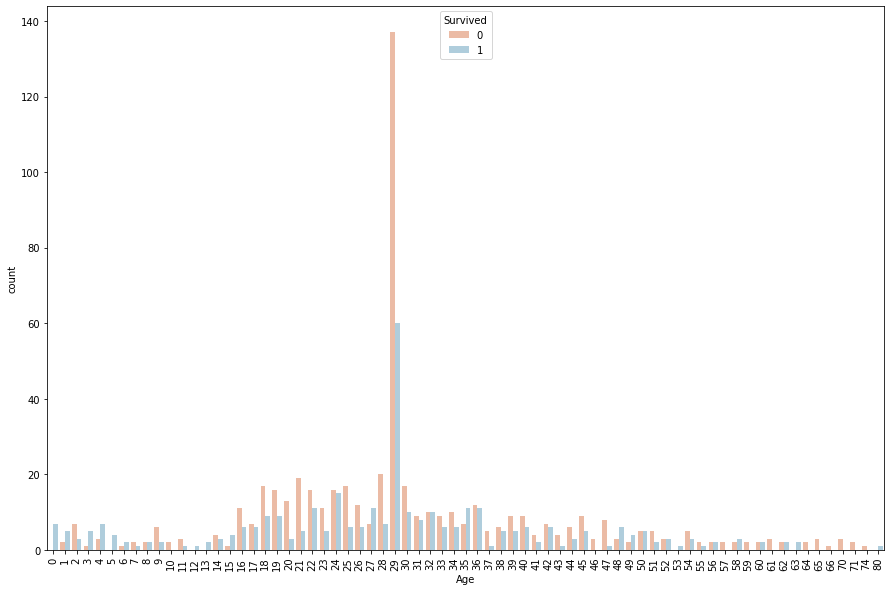

In [20]:
plt.figure(figsize=(15,10)) #sns보다 위쪽라인에 있어야 함.
plt.xticks(rotation=90)
sns.countplot(x='Age', data=df_eda, hue='Survived', palette='RdBu')
plt.show()

In [21]:
df_eda['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

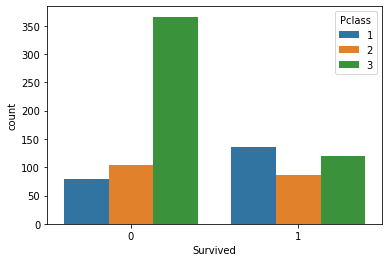

In [22]:
sns.countplot(x='Survived', data=df_eda, hue='Pclass', hue_order=[1, 2, 3])

<AxesSubplot:xlabel='Survived', ylabel='count'>

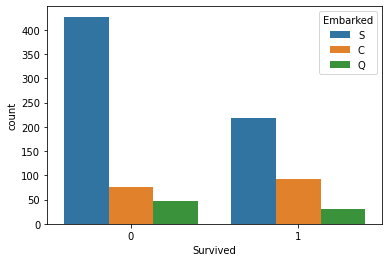

In [23]:
sns.countplot(x='Survived', data=df_eda, hue='Embarked', hue_order=['S', 'C','Q'])

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Embarked_num,E_C,E_Q,E_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S,1,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,0,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S,1,2,0,0,1


In [25]:
# feature(X)의 항목 list
feature = ['Pclass', 'Sex_num', 'Age', 'Fare', 'E_C', 'E_Q', 'E_S']
X = train[feature]

In [26]:
# label(y)의 항목
label = 'Survived'
y = train[label]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

# return받는 데이터의 순서 꼭 지키기, random_state=10, shuffle=True와 False인
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777, shuffle=True)

In [28]:
# 학습 데이터 shape 확인
X_train.shape, y_train.shape

((668, 7), (668,))

In [29]:
# 테스트 데이터 shape 확인
X_test.shape, y_test.shape

((223, 7), (223,))

In [30]:
# 모델 학습을 위한 모듈 import
from sklearn.linear_model import SGDClassifier

In [31]:
# 모델 객체 생성,SGD(Stochastic Gradient Descent)
model_sgd = SGDClassifier(random_state=0)
model_sgd

SGDClassifier(random_state=0)

In [32]:
# 모델 학습
model_sgd.fit(X_train, y_train)

SGDClassifier(random_state=0)

In [33]:
# 테스트 데이터를 넣어서 예측결과 확인
pred = model_sgd.predict(X_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0])

In [34]:
y_test

119    0
429    1
598    0
275    1
120    0
      ..
689    1
418    0
21     1
544    0
104    0
Name: Survived, Length: 223, dtype: int64

In [35]:
# 실제값과 예측값을 맞춘 평균 비율
(pred == y_test).mean()

0.6860986547085202

In [36]:
from sklearn.metrics import classification_report

In [37]:
# Predict를 수행하고 classification_report() 결과 출력하기
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.61      0.71       137
           1       0.57      0.80      0.66        86

    accuracy                           0.69       223
   macro avg       0.70      0.71      0.68       223
weighted avg       0.73      0.69      0.69       223



In [38]:
model_sgd.classes_

array([0, 1])

In [39]:
model_sgd.coef_.shape

(1, 7)

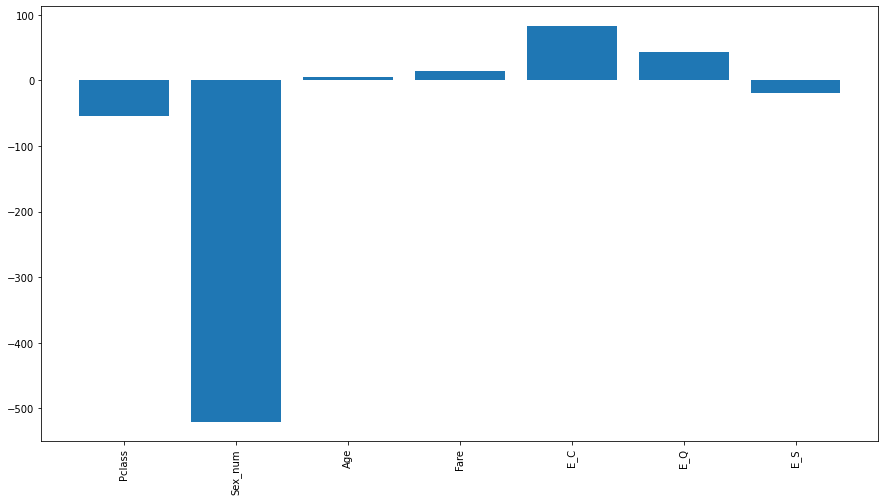

In [41]:
# sgd 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15,8))
plt.bar(X.columns, model_sgd.coef_[0,:])
plt.xticks(rotation=90)
plt.show()

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print('예측 정확도: %.2f' % accuracy_score(y_test, y_pred))

예측 정확도: 0.77


In [43]:
# Predict를 수행하고 classification_report() 결과 출력하기
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       137
           1       0.70      0.69      0.69        86

    accuracy                           0.77       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223



In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

print("예측 정확도: %.2f"%accuracy_score(y_test, y_pred))

예측 정확도: 0.78
